### WHAT TO DO WITH THE DATASET
***
In this project, I'll make a model to predict mobile price based on the characteristics. I'll be using tensorflow keras to do deep neural network. __Deep neural network represents the type of machine learning when the system uses many layers of nodes to derive high-level functions from input information. It means transforming the data into a more creative and abstract component.__
This model is expected could facilitate a company to decide what price mobile phone belongs to their characteristics. So the price is relevance compared to the other company.  

<div class="alert alert-block alert-warning">
<b>
TABLE OF CONTENTS
</div>

* 1. IMPORTING LIBRARIES
* 2. LOADING DATA
* 3. DATA CLEANING
* 4. DATA PREPROCESSING
* 5. EVALUATING MODELS
* 6. CONCLUSION
* 7. END

<div class="alert alert-block alert-warning">
<b>
1. IMPORTING LIBRARIES    
</div>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<div class="alert alert-block alert-warning">
<b>
2. LOADING THE DATA
</div>

In [4]:
df_raw = pd.read_csv('C:/Users/lode/Downloads/data_science/mobile_price_dataset/train.csv')

In [5]:
df = df_raw.copy()

<div class="alert alert-block alert-warning">
<b>
3. DATA CLEANING
</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.describe(include = 'all')
#From table below, we can clearly see max value differs compared to mean values. Indicating there are some outliers.
#I'll just keep the outliers, because i think it is common to have mobile phone with high specs nowadays.
#But i'll check more deeply with boxplot later.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df.columns.values

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'], dtype=object)

In [9]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [10]:
df.isnull().sum()
#There are no missing values.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1adccf4f400>,
 'caps': [<matplotlib.lines.Line2D at 0x1adccf4f9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1adccf4f250>,
 'medians': [<matplotlib.lines.Line2D at 0x1adccf4ff40>,
 'fliers': [<matplotlib.lines.Line2D at 0x1adcd5f0250>,
 'means': []}

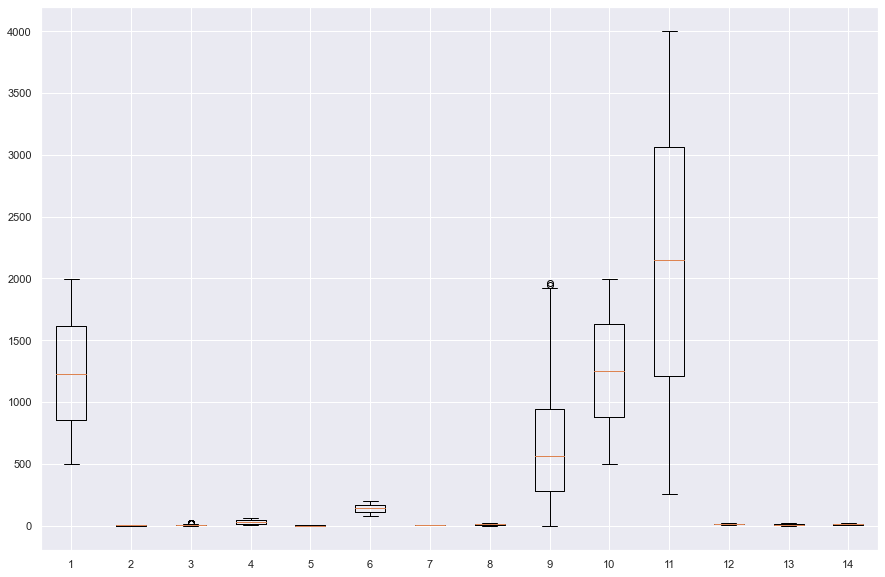

In [12]:
plt.figure(figsize = (15, 10))
plt.boxplot([df['battery_power'], df['clock_speed'], df['fc'], df['int_memory'],
           df['m_dep'], df['mobile_wt'], df['n_cores'], df['pc'], df['px_height'],
            df['px_width'], df['ram'], df['sc_h'], df['sc_w'], df['talk_time']])

#label = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       #'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
#There are no outliers that can affect our analysis

__We can clearly see there are no outliers that over exceed whisker max. So i think it is safe to keep the outliers.__

In [13]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

***
Because there are many features available in this dataset. I assume there will be some multicollinearity between fatures.
So, I'll running varian inflation factor to check if there is multicolinearity between fatures. Then i'll drop the features that contains vif value > 8.
***
__The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. It is used for diagnosing collinearity/multicollinearity.__

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif['Features'] = variables.columns

In [15]:
vif
#i'll drop the columns that contains vif value above 8 to avoid multicollinearity

,VIF,Features
0,7.953793,battery_power
1,4.230906,clock_speed
2,3.406797,fc
3,3.929899,int_memory
4,3.901351,m_dep
5,12.526344,mobile_wt
6,4.593203,n_cores
7,6.217410,pc
8,4.238915,px_height
9,11.561984,px_width


In [16]:
df_cleaned = df.drop(['mobile_wt', 'px_width', 'sc_h'], axis = 1)
df_cleaned.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,ram,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,2,2,20,2549,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,3,6,905,2631,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,5,6,1263,2603,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,6,9,1216,2769,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,2,14,1208,1411,2,15,1,1,0,1


In [17]:
df_cleaned.shape

(2000, 18)

In [18]:
df_cleaned['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

<div class="alert alert-block alert-warning">
<b>
4. DATA PREPROCESSING
</div>

#### BALANCING THE DATASET

In [19]:
df_cleaned['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

#### STANDARDIZE THE DATASET

In [20]:
from sklearn import preprocessing

In [21]:
targets = df_cleaned['price_range']
unscaled_inputs = df_cleaned.drop(['price_range'], axis = 1)

In [22]:
scaled_inputs = preprocessing.scale(unscaled_inputs)

In [23]:
scaled_inputs

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [24]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets[shuffled_indices]

#### SPLITTING THE DATASETS INTO 3 PARTS. TRAIN, VALIDATION, AND TEST DATASET.

In [25]:
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count + validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count + validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count + validation_samples_count:]
test_targets = shuffled_targets[train_samples_count + validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

2386 1600 1.49125
315 200 1.575
299 200 1.495


<div class="alert alert-block alert-warning">
<b>
5. EVALUATING MODELS
</div>


#### MODEL

In [26]:
import tensorflow as tf

In [27]:
input_size = 18
output_size = 4
hidden_layer_size = 50

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(output_size, activation = 'softmax')
]) 

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

batch_size = 100

max_epochs = 100

early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

model.fit(train_inputs,
         train_targets,
         batch_size = batch_size,
         epochs = max_epochs,
         callbacks = [early_stopping],
         validation_data = (validation_inputs, validation_targets),
         verbose = 2
         )

Epoch 1/100
16/16 - 3s - loss: 1.4082 - accuracy: 0.2925 - val_loss: 1.3359 - val_accuracy: 0.3800 - 3s/epoch - 172ms/step
Epoch 2/100
16/16 - 0s - loss: 1.2652 - accuracy: 0.4588 - val_loss: 1.2294 - val_accuracy: 0.4900 - 54ms/epoch - 3ms/step
Epoch 3/100
16/16 - 0s - loss: 1.1516 - accuracy: 0.5437 - val_loss: 1.1310 - val_accuracy: 0.5300 - 49ms/epoch - 3ms/step
Epoch 4/100
16/16 - 0s - loss: 1.0359 - accuracy: 0.5981 - val_loss: 1.0232 - val_accuracy: 0.5850 - 57ms/epoch - 4ms/step
Epoch 5/100
16/16 - 0s - loss: 0.9231 - accuracy: 0.6406 - val_loss: 0.9221 - val_accuracy: 0.6250 - 51ms/epoch - 3ms/step
Epoch 6/100
16/16 - 0s - loss: 0.8166 - accuracy: 0.7088 - val_loss: 0.8244 - val_accuracy: 0.6900 - 64ms/epoch - 4ms/step
Epoch 7/100
16/16 - 0s - loss: 0.7238 - accuracy: 0.7525 - val_loss: 0.7453 - val_accuracy: 0.7450 - 51ms/epoch - 3ms/step
Epoch 8/100
16/16 - 0s - loss: 0.6428 - accuracy: 0.7931 - val_loss: 0.6782 - val_accuracy: 0.7600 - 54ms/epoch - 3ms/step
Epoch 9/100
16/1

In [28]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

7/7 [==============================] - 0s 3ms/step - loss: 0.2696 - accuracy: 0.8850


In [29]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.27. Test accuracy: 88.50%


In [30]:
from tensorflow.keras.models import Sequential, save_model, load_model

In [31]:
filepath = 'C:/Users/lode/Downloads/data_science/mobile_price_dataset./saved_model'
save_model(model, filepath)

INFO:tensorflow:Assets written to: C:/Users/lode/Downloads/data_science/mobile_price_dataset./saved_model\assets


<div class="alert alert-block alert-warning">
<b>
6. CONCLUSION
</div>

* We have the test accuracy score 88% with loss score 0.27. Meaning the model correctly predicted 88% of the dataset.
* Hyper parameters used in the model obtained iteratively.